In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


In [2]:
# Gaussian Process to generate a smooth random field
def generate_gp(L, n):
    x = np.atleast_2d(np.linspace(0, L, L)).T
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    y_train = np.random.randn(L, n)
    gp.fit(x, y_train)
    y_pred, _ = gp.predict(x, return_std=True)
    return y_pred

# Initialize track features
def initialize_track(L, n):
    return generate_gp(L, n)

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)


In [3]:
# Compute speed based on similarity (cosine similarity used here)
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)


In [9]:
# Main function for simulation
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = initialize_track(L, n)
    
    # Initialize multiple agents
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)
    
    fig, ax = plt.subplots()
    
    # Create a plot element for each agent
    circles = [ax.plot([], [], 'o', lw=3)[0] for _ in range(num_agents)]
    
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)

    track_plot, = ax.plot(np.linspace(0, L, L), track[:, 0], 'g-', label='Track Feature 1')
    ax.legend()
    
    while t < 100:  # Simulate for 100 time units
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt

            # Update Visualization for each agent
            circles[i].set_data(positions[i] % L, 0)
        
        t += dt
        
        # Refresh plot
        clear_output(wait=True)
        display(fig)
        plt.pause(0.01)

# Execute main function for simulation with the desired number of agents
main(num_agents=3)


KeyboardInterrupt: 

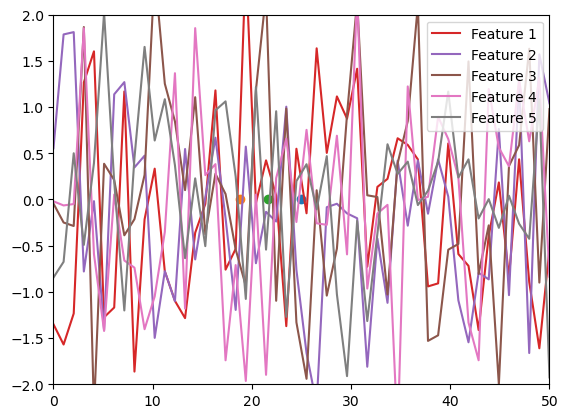

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from IPython.display import clear_output, display

# Gaussian Process to generate a smooth random field
def generate_gp(L, n):
    x = np.atleast_2d(np.linspace(0, L, L)).T
    kernel = C(1.0, (1e-3, 1e3)) * RBF(200, (1e-2, 1e2))  # Increased length scale
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    y_train = np.random.randn(L, n)
    gp.fit(x, y_train)
    y_pred, _ = gp.predict(x, return_std=True)
    return y_pred

# Initialize track features
def initialize_track(L, n):
    return generate_gp(L, n)

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = initialize_track(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)
    
    fig, ax = plt.subplots()
    circles = [ax.plot([], [], 'o', lw=3)[0] for _ in range(num_agents)]
    
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    
    # Plot all features in a single plot
    for i in range(n):
        ax.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax.legend()
    
    while t < 100:
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt
            circles[i].set_data(positions[i] % L, 0)
        
        t += dt
        clear_output(wait=True)
        display(fig)
        plt.pause(0.01)

# Execute main function for simulation with the desired number of agents
main(num_agents=3)


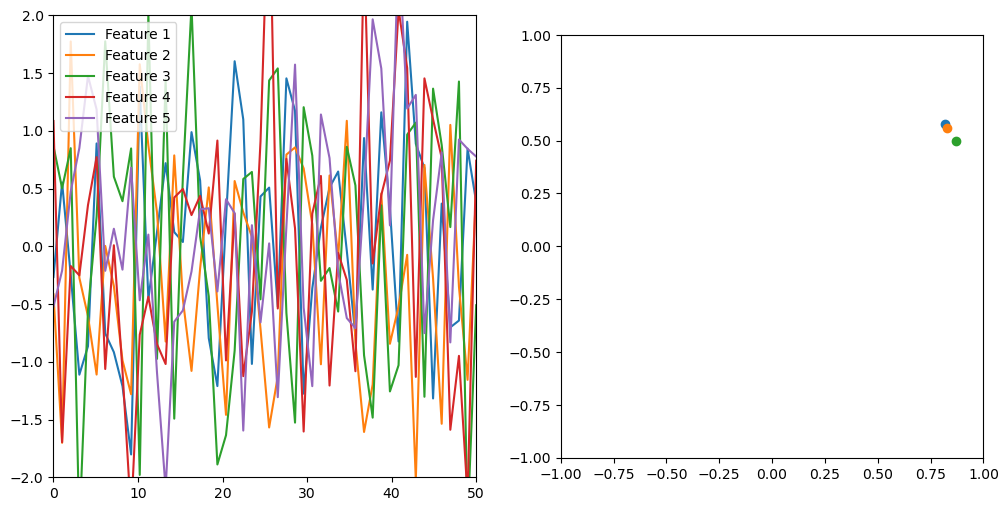

KeyboardInterrupt: 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from IPython.display import clear_output, display

# Gaussian Process to generate a smooth random field
def generate_gp(L, n):
    x = np.atleast_2d(np.linspace(0, L, L)).T
    kernel = C(1.0, (1e-3, 1e3)) * RBF(200, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    y_train = np.random.randn(L, n)
    gp.fit(x, y_train)
    y_pred, _ = gp.predict(x, return_std=True)
    return y_pred

# Initialize track features
def initialize_track(L, n):
    return generate_gp(L, n)

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = initialize_track(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.set_xlim(0, L)
    ax1.set_ylim(-2, 2)
    
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_aspect('equal', 'box')
    
    # Plot track features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    while t < 100:
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt
            
            # Circular representation
            theta = 2 * np.pi * (positions[i] % L) / L
            x, y = np.cos(theta), np.sin(theta)
            ax2.plot(x, y, 'o', lw=3)
        
        t += dt
        clear_output(wait=True)
        display(fig)
        ax2.clear()
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(-1, 1)
        ax2.set_aspect('equal', 'box')
        plt.pause(0.01)

# Execute main function for simulation with the desired number of agents
main(num_agents=3)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from IPython.display import clear_output, display
from scipy.ndimage import gaussian_filter1d
import numpy as np
from numpy import cos, pi

def blend_cosine(a, b, alpha):
    factor = 0.5 * (1 - cos(alpha * pi))
    return (1 - factor) * a + factor * b

# def generate_gp(L, n, length_scale=1000, sigma=5.0, blend_range=10):
#     x = np.atleast_2d(np.linspace(0, L, L)).T
#     kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale, (1e-2, 1e2))
#     gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    
#     y_train = np.random.randn(L, n)
#     gp.fit(x, y_train)
#     y_pred, _ = gp.predict(x, return_std=True)
    
#     # Enforce periodic boundary conditions by blending start and end using cosine interpolation
#     for i in range(blend_range):
#         alpha = i / (blend_range - 1)
#         y_pred[i] = blend_cosine(y_pred[i], y_pred[-blend_range + i], alpha)
#         y_pred[-blend_range + i] = blend_cosine(y_pred[i], y_pred[-blend_range + i], 1 - alpha)
    
#     return y_pred

def blend(a, b, alpha):
    return (1 - alpha) * a + alpha * b
# Gaussian Process to generate a smooth random field
def generate_gp(L, n, length_scale=1000, sigma=5.0, blend_range=10):
    x = np.atleast_2d(np.linspace(0, L, L)).T
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    
    y_train = gaussian_filter1d(np.random.randn(L, n), sigma=sigma, axis=0)
    gp.fit(x, y_train)
    y_pred, _ = gp.predict(x, return_std=True)
    
    # Enforce periodic boundary conditions by blending start and end
    for i in range(blend_range):
        alpha = i / blend_range
        y_pred[i] = blend_cosine(y_pred[i], y_pred[-blend_range + i], alpha)
        y_pred[-blend_range + i] = blend_cosine(y_pred[i], y_pred[-blend_range + i], alpha)
    
    return y_pred

# Initialize track features
def initialize_track(L, n, length_scale=1000, sigma=5.0, blend_range=45):
    return generate_gp(L, n, length_scale, sigma, blend_range)

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = initialize_track(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.set_xlim(0, L)
    ax1.set_ylim(-2, 2)
    
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_aspect('equal', 'box')
    
    # Plot all features in a single plot
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    # Draw a dotted circle for reference
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
    ax2.add_artist(circle)
    
    while t < 100:
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt
            
            # Linear representation
            ax1.plot(positions[i] % L, 0, 'o', lw=3)
            
            # Circular representation
            theta = 2 * np.pi * (positions[i] % L) / L
            x, y = np.cos(theta), np.sin(theta)
            ax2.plot(x, y, 'o', lw=3)
        
        t += dt
        clear_output(wait=True)
        display(fig)
        ax1.clear()
        ax2.clear()
        
        # Redraw features and circle
        for i in range(n):
            ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
        ax1.legend()
        
        circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
        ax2.add_artist(circle)
        
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(-1, 1)
        ax2.set_aspect('equal', 'box')
        plt.pause(0.01)

# Execute main function for simulation with the desired number of agents
main(num_agents=3)


KeyboardInterrupt: 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed based on similarity (cosine similarity)
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main simulation function
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i + 1}')
    ax1.legend()
    ax1.set_title('Track Features')

    # Initialize agent positions in ring plot
    ax2.set_title('Agent Positions')
    circles = [ax2.plot([], [], 'o', lw=3)[0] for _ in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')

    while t < 100:
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt

            # Update agent positions in ring plot
            theta = 2 * np.pi * (positions[i] % L) / L
            circles[i].set_data(np.cos(theta), np.sin(theta))

        t += dt

        # Clear and redraw plots
        clear_output(wait=True)
        display(fig)
        plt.pause(0.01)

# Run simulation with the desired number of agents
main(num_agents=3)


KeyboardInterrupt: 

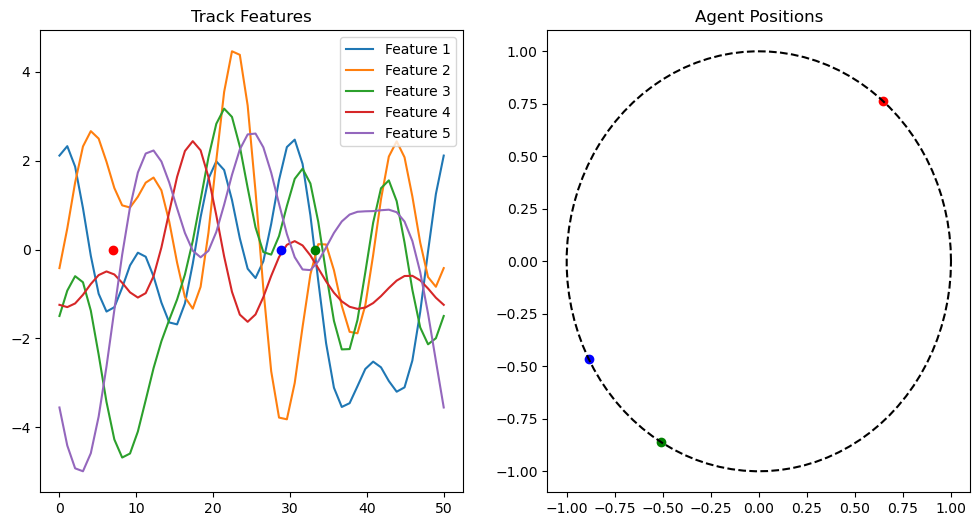

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=1):
    L = 50  # Track length
    n = 5  # Number of features
    alpha = 1.0
    beta = 1.0
    dt = 0.1  # Time step
    t = 0  # Time

    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    positions = np.zeros(num_agents)

    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    ax1.set_title('Track Features')

    # Initialize agent positions in track features plot
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]

    # Initialize agent positions in ring plot
    ax2.set_title('Agent Positions')
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')

    while t < 100:
        for i in range(num_agents):
            agent = agents[i]
            s = positions[i]
            track_features = track[int(s) % L]
            v = speed(agent, track_features, alpha, beta)
            positions[i] += v * dt

            # Update agent positions in both plots
            points[i].set_data(positions[i] % L, 0)
            theta = 2 * np.pi * (positions[i] % L) / L
            circles[i].set_data(np.cos(theta), np.sin(theta))

        t += dt

        # Clear and redraw plots
        clear_output(wait=True)
        display(fig)
        plt.pause(0.01)

# Run simulation with the desired number of agents
main(num_agents=3)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Initialize agent with budget
def initialize_agent_with_budget(n, budget):
    agent = np.random.randn(n)
    return agent, budget

# Hill climb optimization for each agent
def optimize_agent(agent, lap_time, prev_lap_time, budget, delta=0.1):
    if lap_time < prev_lap_time and budget > 0:
        perturbation = np.random.uniform(-delta, delta)
        feature_to_change = np.random.randint(0, len(agent))
        agent[feature_to_change] += perturbation
        budget -= np.abs(perturbation)
    return agent, max(budget, 0)

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=3, budget=1.0):
    L, n, alpha, beta, dt = 50, 5, 1.0, 1.0, 0.1
    track = generate_fourier(L, n)
    agents = [initialize_agent_with_budget(n, budget) for _ in range(num_agents)]
    positions = np.zeros(num_agents)

    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    prev_lap_times = np.inf * np.ones(num_agents)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')
    
    while any(agent[1] > 0 for agent in agents):
        lap_times = np.zeros(num_agents)
        positions = np.zeros(num_agents)  # Reset for a new lap
        t = 0
        
        while t < 100:
            for i in range(num_agents):
                agent, agent_budget = agents[i]
                s = positions[i]
                track_features = track[int(s) % L]
                v = speed(agent, track_features, alpha, beta)
                positions[i] += v * dt
                lap_times[i] += dt
                
                # Update visualization
                points[i].set_data(positions[i] % L, 0)
                theta = 2 * np.pi * (positions[i] % L) / L
                circles[i].set_data(np.cos(theta), np.sin(theta))

            t += dt
            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)
        
        # Optimize agents based on lap times
        for i in range(num_agents):
            agent, agent_budget = agents[i]
            agents[i] = optimize_agent(agent, lap_times[i], prev_lap_times[i], agent_budget)
            prev_lap_times[i] = lap_times[i]

main(num_agents=3, budget=1.0)


KeyboardInterrupt: 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Initialize agent with budget
def initialize_agent_with_budget(n, budget):
    agent = np.random.randn(n)
    return agent, budget

# Hill climb optimization for each agent
def optimize_agent(agent, lap_time, prev_lap_time, budget, delta=0.1):
    if lap_time < prev_lap_time and budget > 0:
        perturbation = np.random.uniform(-delta, delta)
        feature_to_change = np.random.randint(0, len(agent))
        agent[feature_to_change] += perturbation
        budget -= np.abs(perturbation)
    return agent, max(budget, 0)

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=3, num_laps=10):
    L, n, alpha, beta, dt = 50, 5, 1.0, 1.0, 0.5
    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    lap_times_history = np.zeros((num_laps, num_agents))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')
    
    for lap in range(num_laps):
        positions = np.zeros(num_agents)  # Reset for a new lap
        lap_times = np.zeros(num_agents)
        
        while np.any(positions < L):
            for i in range(num_agents):
                if positions[i] >= L:
                    continue  # Skip agents that have finished the lap
                agent = agents[i]
                s = positions[i]
                track_features = track[int(s) % L]
                v = speed(agent, track_features, alpha, beta)
                positions[i] += v * dt
                lap_times[i] += dt
                
                # Update visualization
                points[i].set_data(positions[i] % L, 0)
                theta = 2 * np.pi * (positions[i] % L) / L
                circles[i].set_data(np.cos(theta), np.sin(theta))

            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)
        
        lap_times_history[lap, :] = lap_times
        
        # Plot lap times history
        ax3.clear()
        for i in range(num_agents):
            ax3.plot(range(lap + 1), lap_times_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax3.legend()
        ax3.set_title('Lap Times Progression')
        ax3.set_xlabel('Lap')
        ax3.set_ylabel('Lap Time')
        
        # Optional: Optimize agents based on lap times here
        

main(num_agents=3, num_laps=10)

KeyboardInterrupt: 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Initialize agent with budget
def initialize_agent_with_budget(n, budget):
    agent = np.random.randn(n)
    return agent, budget

# Hill climb optimization for each agent
def optimize_agent(agent, lap_time, prev_lap_time, budget, delta=0.1):
    if lap_time < prev_lap_time and budget > 0:
        perturbation = np.random.uniform(-delta, delta)
        feature_to_change = np.random.randint(0, len(agent))
        agent[feature_to_change] += perturbation
        budget -= np.abs(perturbation)
    return agent, max(budget, 0)

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=3, num_laps=10, initial_budget=1.0):
    L, n, alpha, beta, dt = 50, 5, 1.0, 1.0, 0.8
    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    budgets = np.ones(num_agents) * initial_budget
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    lap_times_history = np.zeros((num_laps, num_agents))
    prev_lap_times = np.inf * np.ones(num_agents)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')
    
    for lap in range(num_laps):
        positions = np.zeros(num_agents)  # Reset for a new lap
        lap_times = np.zeros(num_agents)
        
        while np.any(positions < L):
            for i in range(num_agents):
                if positions[i] >= L:
                    continue  # Skip agents that have finished the lap
                agent = agents[i]
                s = positions[i]
                track_features = track[int(s) % L]
                v = speed(agent, track_features, alpha, beta)
                positions[i] += v * dt
                lap_times[i] += dt
                
                # Update visualization
                points[i].set_data(positions[i] % L, 0)
                theta = 2 * np.pi * (positions[i] % L) / L
                circles[i].set_data(np.cos(theta), np.sin(theta))

            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)
        
        lap_times_history[lap, :] = lap_times
        
        # Optimize agents based on lap times
        for i in range(num_agents):
            agents[i], budgets[i] = optimize_agent(agents[i], lap_times[i], prev_lap_times[i], budgets[i])
        
        prev_lap_times = lap_times
        
        # Plot lap times history
        ax3.clear()
        for i in range(num_agents):
            ax3.plot(range(lap + 1), lap_times_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax3.legend()
        ax3.set_title('Lap Times Progression')
        ax3.set_xlabel('Lap')
        ax3.set_ylabel('Lap Time')

main(num_agents=3, num_laps=50, initial_budget=100.0)

KeyboardInterrupt: 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Initialize agent with budget
def initialize_agent_with_budget(n, budget):
    agent = np.random.randn(n)
    return agent, budget

# Hill climb optimization for each agent
def optimize_agent(agent, lap_time, prev_lap_time, budget, delta=0.1):
    if lap_time < prev_lap_time and budget > 0:
        perturbation = np.random.uniform(-delta, delta)
        feature_to_change = np.random.randint(0, len(agent))
        agent[feature_to_change] += perturbation
        budget -= np.abs(perturbation)
    return agent, max(budget, 0)

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=3, num_laps=10, initial_budget=1.0):
    L, n, alpha, beta, dt = 50, 5, 1.0, 1.0, 1.0
    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    budgets = np.ones(num_agents) * initial_budget

    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    lap_times_history = np.zeros((num_laps, num_agents))
    budget_history = np.zeros((num_laps, num_agents))
    prev_lap_times = np.inf * np.ones(num_agents)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
    
    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')
    
    for lap in range(num_laps):
        positions = np.zeros(num_agents)  # Reset for a new lap
        lap_times = np.zeros(num_agents)

        while np.any(positions < L):
            for i in range(num_agents):
                if positions[i] >= L:
                    continue  # Skip agents that have finished the lap
                agent = agents[i]
                s = positions[i]
                track_features = track[int(s) % L]
                v = speed(agent, track_features, alpha, beta)
                positions[i] += v * dt
                lap_times[i] += dt
                
                # Update visualization
                points[i].set_data(positions[i] % L, 0)
                theta = 2 * np.pi * (positions[i] % L) / L
                circles[i].set_data(np.cos(theta), np.sin(theta))

            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)
        
        lap_times_history[lap, :] = lap_times
        budget_history[lap, :] = budgets

        # Optimize agents based on lap times
        for i in range(num_agents):
            agents[i], budgets[i] = optimize_agent(agents[i], lap_times[i], prev_lap_times[i], budgets[i])

        prev_lap_times = lap_times

        # Plot lap times history
        ax3.clear()
        for i in range(num_agents):
            ax3.plot(range(lap + 1), lap_times_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax3.legend()
        ax3.set_title('Lap Times Progression')
        ax3.set_xlabel('Lap')
        ax3.set_ylabel('Lap Time')

        # Plot budget history
        ax4.clear()
        for i in range(num_agents):
            ax4.plot(range(lap + 1), budget_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax4.legend()
        ax4.set_title('Budget Progression')
        ax4.set_xlabel('Lap')
        ax4.set_ylabel('Remaining Budget')

main(num_agents=3, num_laps=50, initial_budget=100.0)

KeyboardInterrupt: 

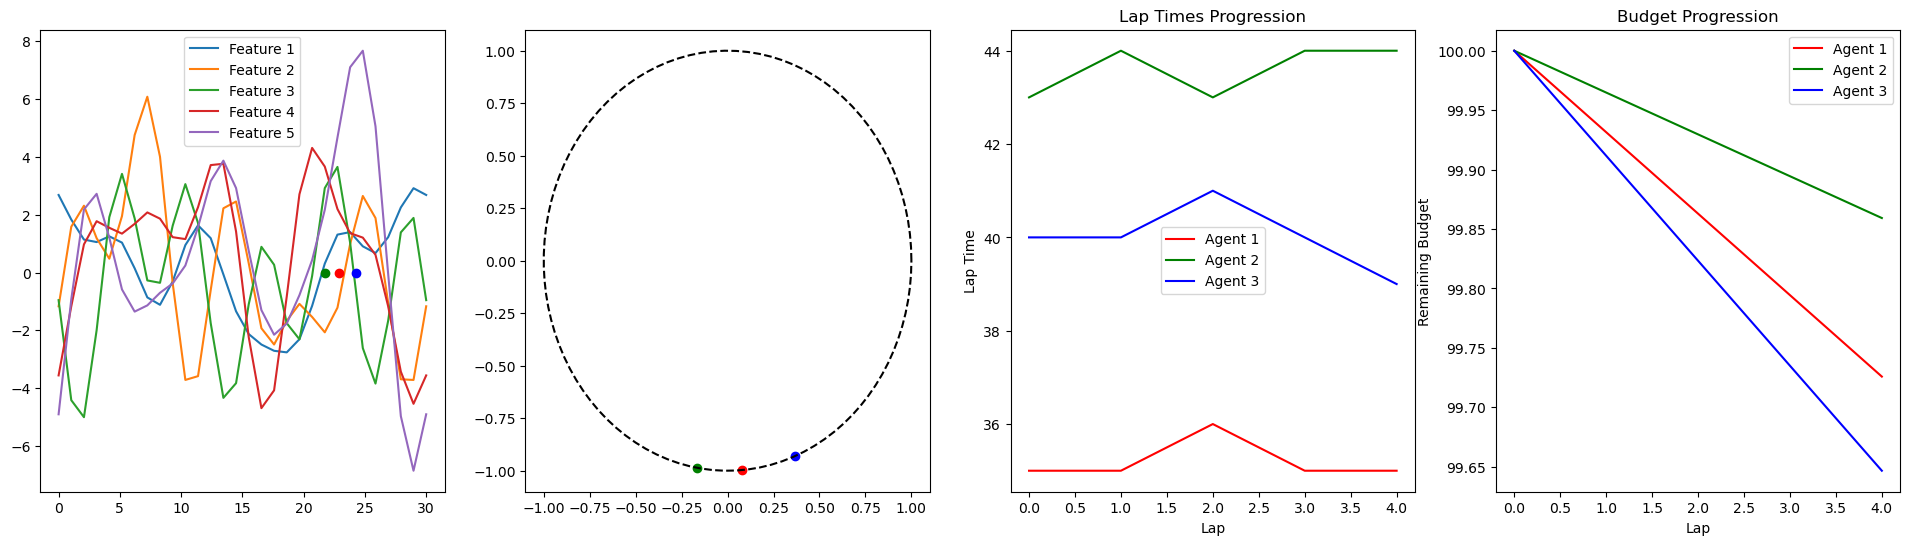

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Initialize global variables for history and best states
last_successful_feature = None
last_successful_perturbation = None
last_best_agent_state = None
last_best_lap_time = None

# Initialize agent with budget
def initialize_agent_with_budget(n, budget):
    agent = np.random.randn(n)
    return agent, budget

# # Hill climb optimization for each agent
# def optimize_agent(agent, lap_time, prev_lap_time, budget, delta=0.1):
#     if lap_time < prev_lap_time and budget > 0:
#         perturbation = np.random.uniform(-delta, delta)
#         feature_to_change = np.random.randint(0, len(agent))
#         agent[feature_to_change] += perturbation
#         budget -= np.abs(perturbation)
#     return agent, max(budget, 0)

# Fourier-based track feature generator
def generate_fourier(L, n, N=5):
    x = np.linspace(0, 1, L)
    track = np.zeros((L, n))
    for j in range(n):
        A0 = np.random.randn()
        track[:, j] += A0
        for i in range(1, N + 1):
            An = np.random.randn()
            Bn = np.random.randn()
            track[:, j] += An * np.cos(2 * np.pi * i * x) + Bn * np.sin(2 * np.pi * i * x)
    return track

# Initialize agent features
def initialize_agent(n):
    return np.random.randn(n)

# Compute speed
def speed(agent, track_features, alpha=1.0, beta=1.0):
    norm_agent = np.linalg.norm(agent)
    norm_track = np.linalg.norm(track_features)
    return alpha + beta * np.dot(agent, track_features) / (norm_agent * norm_track)

# Main function for simulation
def main(num_agents=3, num_laps=10, initial_budget=1.0):
    L, n, alpha, beta, dt = 30, 5, 1.0, 1.0, 1.0
    
    global last_successful_feature, last_successful_perturbation, last_best_agent_state, last_best_lap_time
    last_successful_feature = np.zeros(num_agents, dtype=int)
    last_successful_perturbation = np.zeros(num_agents)
    last_best_agent_state = [np.zeros(n) for _ in range(num_agents)]
    last_best_lap_time = np.inf * np.ones(num_agents)
    
    
    track = generate_fourier(L, n)
    agents = [initialize_agent(n) for _ in range(num_agents)]
    budgets = np.ones(num_agents) * initial_budget

    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    lap_times_history = np.zeros((num_laps, num_agents))
    budget_history = np.zeros((num_laps, num_agents))
    prev_lap_times = np.inf * np.ones(num_agents)

    def optimize_agent(agent, lap_time, prev_lap_time, budget, agent_idx, delta=0.1):
        global last_successful_feature, last_successful_perturbation, last_best_agent_state, last_best_lap_time

        # Check if the performance improved compared to the best-known state
        if lap_time < last_best_lap_time[agent_idx]:
            # Update best-known state
            last_best_agent_state[agent_idx] = np.copy(agent)
            last_best_lap_time[agent_idx] = lap_time

            # Random perturbation for the next lap
            perturbation = np.random.uniform(-delta, delta)
            feature_to_change = np.random.randint(0, len(agent))
            
            if budget - np.abs(perturbation) >= 0:
                agent[feature_to_change] += perturbation
                budget -= np.abs(perturbation)

                # Store this as the last successful change
                last_successful_feature[agent_idx] = feature_to_change
                last_successful_perturbation[agent_idx] = perturbation
        else:
            # Try to move in the direction of the last successful change
            feature_to_change = last_successful_feature[agent_idx]
            perturbation = last_successful_perturbation[agent_idx]
            
            if feature_to_change is not None and perturbation != 0 and budget - np.abs(perturbation) >= 0:
                agent[feature_to_change] += perturbation
                budget -= np.abs(perturbation)
            else:
                # Roll back to the best-known state if no improvement
                agent = np.copy(last_best_agent_state[agent_idx])
                last_successful_feature[agent_idx] = None
                last_successful_perturbation[agent_idx] = 0
        
        return agent, max(budget, 0)


    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
    
    # Plot features
    for i in range(n):
        ax1.plot(np.linspace(0, L, L), track[:, i], label=f'Feature {i+1}')
    ax1.legend()
    
    points = [ax1.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    circles = [ax2.plot([], [], 'o', lw=3, color=colors[i % len(colors)])[0] for i in range(num_agents)]
    ax2.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 'k--')
    
    for lap in range(num_laps):
        positions = np.zeros(num_agents)  # Reset for a new lap
        lap_times = np.zeros(num_agents)

        while np.any(positions < L):
            for i in range(num_agents):
                if positions[i] >= L:
                    continue  # Skip agents that have finished the lap
                agent = agents[i]
                s = positions[i]
                track_features = track[int(s) % L]
                v = speed(agent, track_features, alpha, beta)
                positions[i] += v * dt
                lap_times[i] += dt
                
                # Update visualization
                points[i].set_data(positions[i] % L, 0)
                theta = 2 * np.pi * (positions[i] % L) / L
                circles[i].set_data(np.cos(theta), np.sin(theta))

            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)
        
        lap_times_history[lap, :] = lap_times
        budget_history[lap, :] = budgets

        # Optimize agents based on lap times
        for i in range(num_agents):
            agents[i], budgets[i] = optimize_agent(agents[i], lap_times[i], prev_lap_times[i], budgets[i], i)

        prev_lap_times = lap_times

        # Plot lap times history
        ax3.clear()
        for i in range(num_agents):
            ax3.plot(range(lap + 1), lap_times_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax3.legend()
        ax3.set_title('Lap Times Progression')
        ax3.set_xlabel('Lap')
        ax3.set_ylabel('Lap Time')

        # Plot budget history
        ax4.clear()
        for i in range(num_agents):
            ax4.plot(range(lap + 1), budget_history[:lap+1, i], label=f'Agent {i+1}', color=colors[i % len(colors)])
        ax4.legend()
        ax4.set_title('Budget Progression')
        ax4.set_xlabel('Lap')
        ax4.set_ylabel('Remaining Budget')

main(num_agents=3, num_laps=50, initial_budget=100.0)